In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


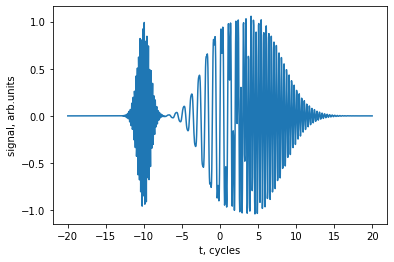

In [20]:
# generate the signal

NUM_CYCLES = 40

t = np.linspace(-NUM_CYCLES / 2 * 2 * pi, NUM_CYCLES / 2 * 2 * pi, 2**10)

y = np.sin(t) * exp(-t**2 / (NUM_CYCLES  / 2)**2)
y += np.sin(3 * t) * exp(-(t - 5 * 2 * pi)**2 / (2 * 20**2))
y += np.sin(5.5 * t) * exp(-(t + 10 * 2 * pi)**2 / (2 * 5**2))

plt.plot(t / (2 * pi) , y)

xlabel('t, cycles')
ylabel('signal, arb.units')
show()

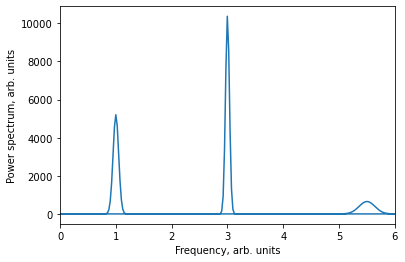

In [21]:
# Fourier spectrum
sp = np.fft.fft(y)
w = fft.fftfreq(len(y), d=(t[1] - t[0]) / (2 * pi))

plot(w, abs(sp)**2)

xlim(0, 6)
xlabel('Frequency, arb. units')
ylabel('Power spectrum, arb. units')
show()

In [22]:
def get_specgram(time=t, signal=y, nwindowsteps=1000):
    
    data = np.zeros((time.shape[0], nwindowsteps))
    
    WIDTH = 1.5

    positions_list = np.linspace(-20, 20, nwindowsteps)

    for pos_id, pos in enumerate(positions_list):

        window_width = WIDTH * 2 * pi
        window_position = pos * 2 * pi
        window_function = exp(-(time - window_position)**2 / (2 * window_width**2))

        y_window = signal * window_function

        data[:, pos_id] = abs(np.fft.fft(y_window))

    return data

In [23]:
def plot_specgram(specgram_data):
    fig, ax = subplots(figsize=(14, 11))

    dims = extent=[min(t) / (2 * pi), max(t) / (2 * pi), w[0], 2 * w[int(len(t) / 2) - 1]]

    im = ax.imshow(specgram_data, aspect='auto', origin='lower', extent=dims)

    fig.colorbar(im, orientation='vertical')

    ax.set_ylim(0, 10)
    ax.set_xlabel('window position', fontsize = 20)
    ax.set_ylabel('frequency', fontsize = 20)
    show()

# 1. Plotting spectrogram

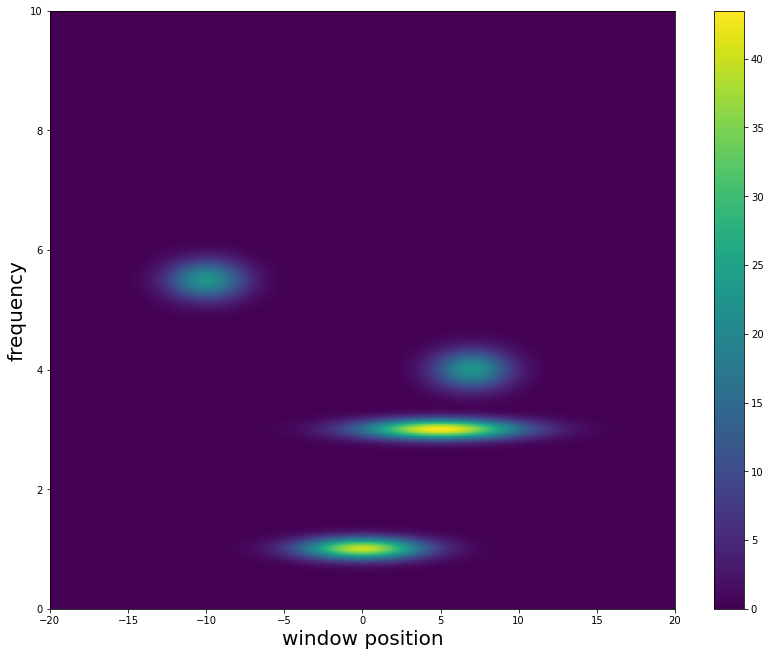

In [27]:
plot_specgram(get_specgram())

### We can witness the order of distinct oscillations with following frequencies(approximately):
   1. $5.5$
   2. $3$
   3. $1$

# 2. Introducing new oscillation

#### Add new oscillation with frequency = 4, time shifted on 7 cycles

In [73]:
y += np.sin(4 * t) * exp(-(t - 7 * 2 * pi)**2 / (2 * 5**2))

In [19]:
plot_specgram(get_specgram())

(19689, 1000)

### Now we see new oscillation on our graph

# 3. Measuring dependency of computation time on number of timesteps

In [75]:
import timeit

Accumulated sum: 10.331 time shift: -5
Accumulated sum: 3.283 time shift: -4
Accumulated sum: 10.288 time shift: -3
Accumulated sum: 10.988 time shift: -2
Accumulated sum: 6.647 time shift: -1
Accumulated sum: 2.641 time shift: 0
Accumulated sum: 6.157 time shift: 1
Accumulated sum: 12.253 time shift: 2
Accumulated sum: 12.287 time shift: 3
Accumulated sum: 11.874 time shift: 4
Accumulated sum: 12.180 time shift: 5


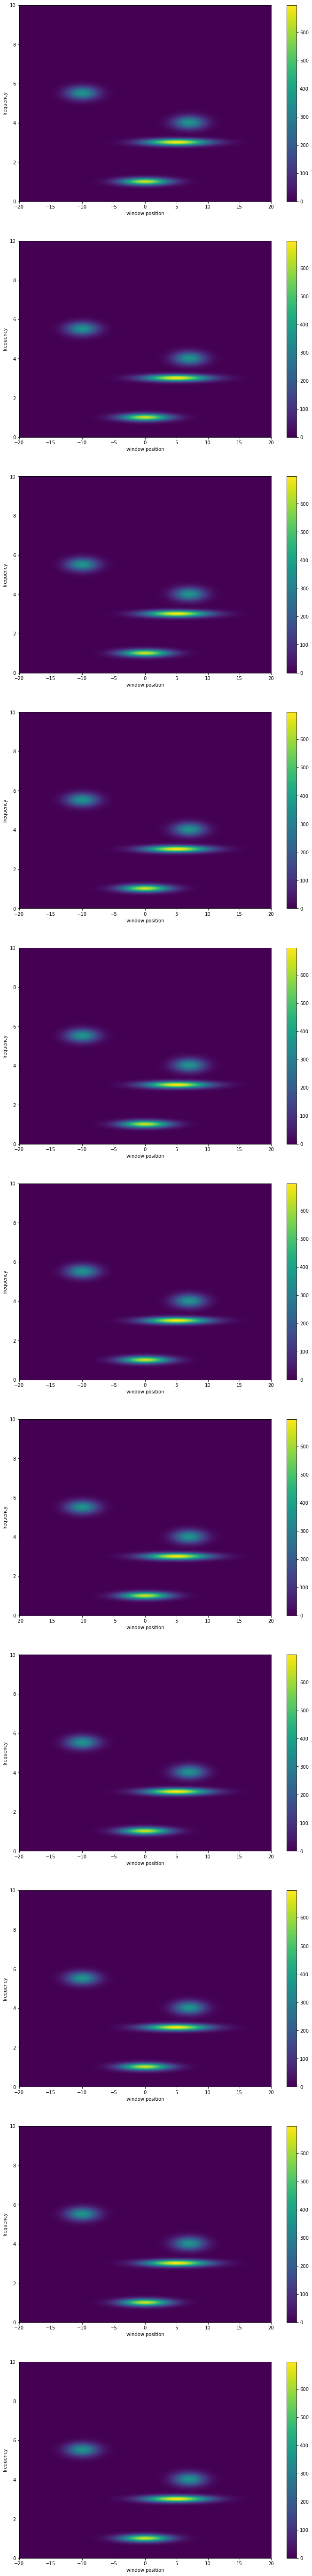

In [140]:
# generate the signal

fig, ax = subplots(nrows=11, ncols=1, figsize=(12, 100))

NUM_OSC = 40

shifts_list = np.arange(-5, 6, 1)

times = []

for index, shift in enumerate(shifts_list):

    t = np.linspace(-NUM_OSC / 2 * 2 * pi, NUM_OSC / 2 * 2 * pi, 2**14 + shift)

    y = np.sin(t) * exp(-t**2 / (NUM_OSC  / 2)**2)
    y += np.sin(3 * t) * exp(-(t - 5 * 2 * pi)**2 / (2 * 20**2))
    y += np.sin(5.5 * t) * exp(-(t + 10 * 2 * pi)**2 / (2 * 5**2))
    y += np.sin(4 * t) * exp(-(t - 7 * 2 * pi)**2 / (2 * 5**2))
    
    accumulator = 0.
    N_RUNS = 10
    
    for _ in range(N_RUNS):
        start = timeit.default_timer()
        get_specgram(signal=y, time=t)
        accumulator += timeit.default_timer() - start

    print(f'Accumulated sum: {accumulator:.3f}', 'time shift:', shift)
    
    times.append(round(accumulator / N_RUNS, 3))
    
    dims = extent=[min(t) / (2 * pi), max(t) / (2 * pi), w[0], 2 * w[int(len(t) / 2) - 1]]

    data = get_specgram(signal=y, time=t)
    
    im = ax[index].imshow(data, aspect='auto', origin='lower', extent=dims)
    colorbar(im, orientation='vertical', ax=ax[index])
    
    ax[index].set_ylim(0, 10)
    ax[index].set_xlabel('window position')
    ax[index].set_ylabel('frequency')

show()

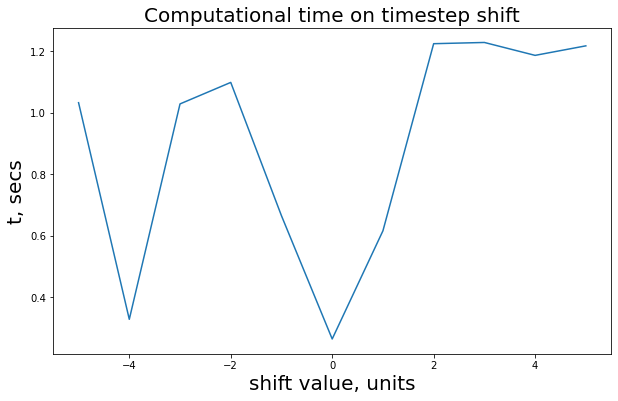

In [141]:
_, ax = subplots(figsize=(10, 6))

ax.plot(shifts_list, times)

ax.set_title('Computational time on timestep shift', fontsize=20)
xlabel('shift value, units', fontsize=20)
ylabel('t, secs', fontsize=20)
show()

### We can see, that all spectrograms look similar, but computation time differs, although plot is not monotonous.
### My guess is that it depends on how ```np.fft.fft``` innerly implemented. 
### For example ```0``` shift value corresponds to the size, which is exact power of ```2```, and i think this is why the function executes faster. 